Install prerequisites and import appropriate functions

In [1]:
%pip install pandas matplotlib scikit-learn seaborn
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import itertools


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Read input CSV from the folder and print it to confirm successful read

In [19]:
df_pm = pd.read_csv('22-3-2023  -  14-54.csv',delimiter=',',header='infer')

In [20]:
df_pm

,DateTime,Fidas 200 PM2.5,SPS30 PM2.5,SEN55 PM2.5,HPMA115 PM2.5,NextPM PM2.5,SDS011 PM2.5
0,DateTime,Fidas 200 PM2.5,SPS30 PM2.5,SEN55 PM2.5,HPMA115 PM2.5,NextPM PM2.5,SDS011 PM2.5
1,2023-3-22 14:54:51,0,5.26,3.30,7,0.00,2.10
2,2023-3-22 14:54:57,0,4.76,3.60,7,0.00,2.00
3,2023-3-22 14:55:2,0,4.26,3.40,3,0.00,2.20
4,2023-3-22 14:55:8,0,3.81,3.40,2,10.10,2.30
...,...,...,...,...,...,...,...
90056,2023-3-28 9:18:3,0,1.96,2.30,2,2.60,1.90
90057,2023-3-28 9:18:9,0,1.87,2.20,3,2.30,1.80
90058,2023-3-28 9:18:14,0,1.80,2.00,3,1.90,1.70
90059,2023-3-28 9:18:20,0,1.68,2.00,3,2.40,1.60


Remove labels for not deployed sensors, convert the datetime characteristic into a pandas datetime characteristic

In [21]:
df_pm = df_pm.drop(['Fidas 200 PM2.5'], axis=1)
df_pm = df_pm.drop(0)
df_pm['DateTime'] = pd.to_datetime(df_pm.DateTime)
df_pm

,DateTime,SPS30 PM2.5,SEN55 PM2.5,HPMA115 PM2.5,NextPM PM2.5,SDS011 PM2.5
1,2023-03-22 14:54:51,5.26,3.30,7,0.00,2.10
2,2023-03-22 14:54:57,4.76,3.60,7,0.00,2.00
3,2023-03-22 14:55:02,4.26,3.40,3,0.00,2.20
4,2023-03-22 14:55:08,3.81,3.40,2,10.10,2.30
5,2023-03-22 14:55:14,3.37,3.20,2,5.80,2.30
...,...,...,...,...,...,...
90056,2023-03-28 09:18:03,1.96,2.30,2,2.60,1.90
90057,2023-03-28 09:18:09,1.87,2.20,3,2.30,1.80
90058,2023-03-28 09:18:14,1.80,2.00,3,1.90,1.70
90059,2023-03-28 09:18:20,1.68,2.00,3,2.40,1.60


Plot the five mass concentrations alongside each other, add labels and legends

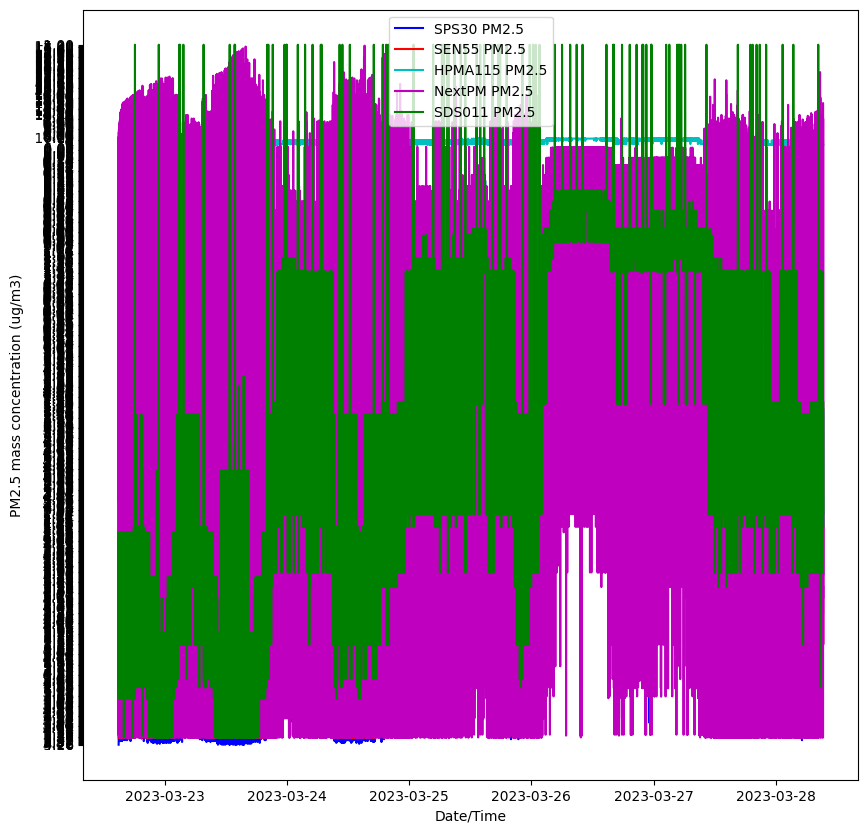

In [24]:
plt.plot(df_pm['DateTime'], df_pm['SPS30 PM2.5'], 'b-', df_pm['DateTime'], df_pm['SEN55 PM2.5'], 'r-', df_pm['DateTime'], df_pm['HPMA115 PM2.5'], 'c-', df_pm['DateTime'], df_pm['NextPM PM2.5'], 'm-', df_pm['DateTime'], df_pm['SDS011 PM2.5'], 'g-')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['SPS30 PM2.5', 'SEN55 PM2.5', 'HPMA115 PM2.5', 'NextPM PM2.5', 'SDS011 PM2.5'])
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

The startup of the sensors is presenting issues, drop the first 100 values and plot the four mass concentrations alongside each other, add labels and legends

In [16]:
df_pm2 = df_pm.drop(range(0,100)).drop(range(1000,44935))
plt.plot(df_pm2['DateTime'], df_pm2['Fidas 200 PM2.5'], 'b-', df_pm2['DateTime'], df_pm2['SEN55 PM2.5'], 'r-', df_pm2['DateTime'], df_pm2['HPMA115 PM2.5'], 'c-', df_pm2['DateTime'], df_pm2['SDS011 PM2.5'], 'g-')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['Fidas 200 PM2.5', 'SEN55 PM2.5', 'HPMA115 PM2.5', 'SDS011 PM2.5'])
plt.show()

KeyError: '[0] not found in axis'

Calculate and print RMSE

In [40]:
from sklearn.metrics import mean_squared_error 
rmsesds = mean_squared_error(df_pm['Fidas 200 PM2.5'], df_pm['SDS011 PM2.5'], squared = False )
print(rmsesds)
rmsehpma = mean_squared_error(df_pm['Fidas 200 PM2.5'], df_pm['HPMA115 PM2.5'], squared = False )
print(rmsehpma)
rmsesen = mean_squared_error(df_pm['Fidas 200 PM2.5'], df_pm['SEN55 PM2.5'], squared = False )
print(rmsesen)


0.2159482544581883
0.36867812011009504
0.1385688024328628


Run moving average of sds data to try and improve data quality and plot against original data

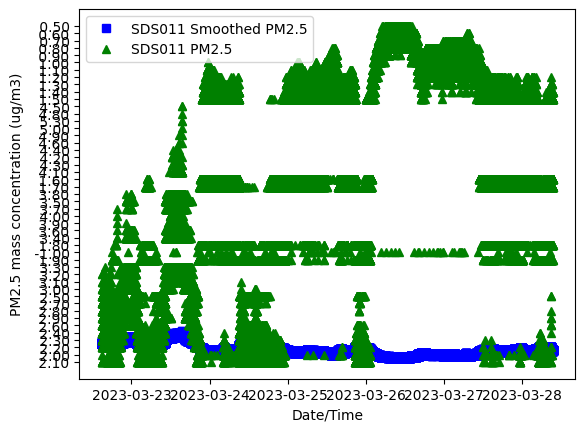

In [17]:
df_pm['SDS011 Smoothed PM2.5'] = df_pm['SDS011 PM2.5'].rolling(30).sum()/30
plt.plot(df_pm['DateTime'], df_pm['SDS011 Smoothed PM2.5'], 'bs', df_pm['DateTime'], df_pm['SDS011 PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['SDS011 Smoothed PM2.5', 'SDS011 PM2.5'])
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

Plot smoothed SDS011 and FIDAS readings against each other

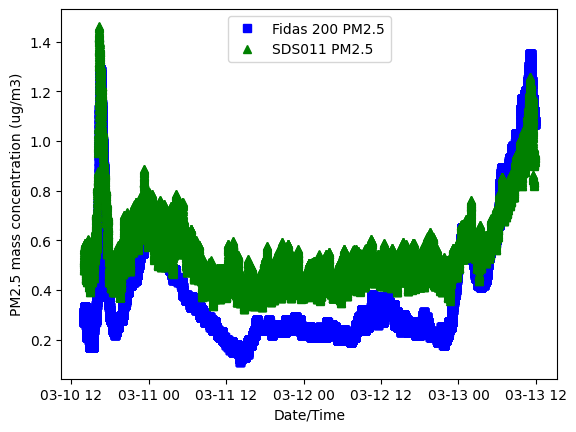

In [42]:
plt.plot(df_pm['DateTime'], df_pm['Fidas 200 PM2.5'], 'bs', df_pm['DateTime'], df_pm['SDS011 Smoothed PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['Fidas 200 PM2.5', 'SDS011 PM2.5'])
plt.show()

Run moving average of SEN data to try and improve data quality and plot against original data

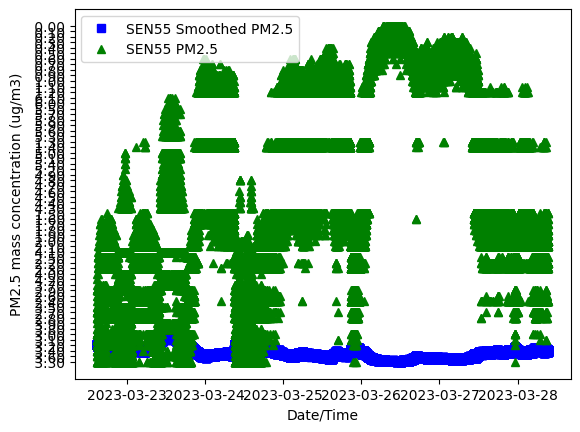

In [18]:
df_pm['SEN55 Smoothed PM2.5'] = df_pm['SEN55 PM2.5'].rolling(30).sum()/30
plt.plot(df_pm['DateTime'], df_pm['SEN55 Smoothed PM2.5'], 'bs', df_pm['DateTime'], df_pm['SEN55 PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['SEN55 Smoothed PM2.5', 'SEN55 PM2.5'])
plt.show()

Plot smoothed SEN55 and FIDAS readings against each other

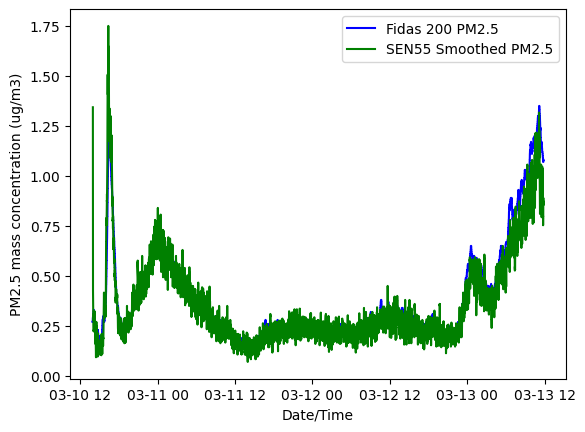

In [44]:
plt.plot(df_pm['DateTime'], df_pm['Fidas 200 PM2.5'], 'b-', df_pm['DateTime'], df_pm['SEN55 Smoothed PM2.5'], 'g-')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['Fidas 200 PM2.5', 'SEN55 Smoothed PM2.5'])
plt.show()

Run moving average of HPMA data to try and improve data quality and plot against original data

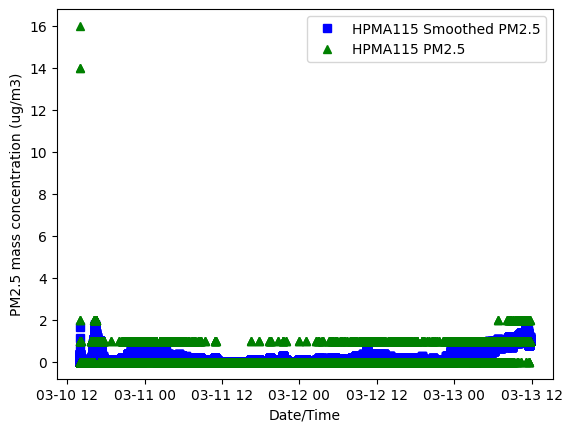

In [45]:
df_pm['HPMA115 Smoothed PM2.5'] = df_pm['HPMA115 PM2.5'].rolling(30).sum()/30
plt.plot(df_pm['DateTime'], df_pm['HPMA115 Smoothed PM2.5'], 'bs', df_pm['DateTime'], df_pm['HPMA115 PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['HPMA115 Smoothed PM2.5', 'HPMA115 PM2.5'])
plt.show()

Plot smoothed HPMA and FIDAS readings against each other

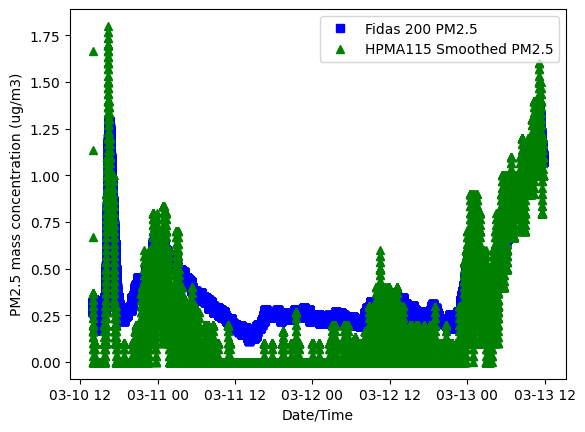

In [46]:
plt.plot(df_pm['DateTime'], df_pm['Fidas 200 PM2.5'], 'bs', df_pm['DateTime'], df_pm['HPMA115 Smoothed PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['Fidas 200 PM2.5', 'HPMA115 Smoothed PM2.5'])
plt.show()

In [47]:
rmsesds = mean_squared_error(df_pm.dropna(axis=0, how='any')['Fidas 200 PM2.5'], df_pm.dropna(axis=0, how='any')['SDS011 Smoothed PM2.5'], squared = False )
print(rmsesds)
rmsehpma = mean_squared_error(df_pm.dropna(axis=0, how='any')['Fidas 200 PM2.5'], df_pm.dropna(axis=0, how='any')['HPMA115 Smoothed PM2.5'], squared = False )
print(rmsehpma)
rmsesen = mean_squared_error(df_pm.dropna(axis=0, how='any')['Fidas 200 PM2.5'], df_pm.dropna(axis=0, how='any')['SEN55 Smoothed PM2.5'], squared = False )
print(rmsesen)

0.1972189196952522
0.2422951228720783
0.08323401941427624


In [48]:
FIDASSEN552 = r2_score(df_pm.dropna(axis=0, how='any')['Fidas 200 PM2.5'], df_pm.dropna(axis=0, how='any')['SEN55 Smoothed PM2.5'])

print('FIDAS SEN55 R2 = ', FIDASSEN552)

FIDASHPMAR2 = r2_score(df_pm.dropna(axis=0, how='any')['Fidas 200 PM2.5'], df_pm.dropna(axis=0, how='any')['HPMA115 Smoothed PM2.5'])

print('FIDAS GPMA R2 = ', FIDASHPMAR2)

FIDASSDS011R2 = r2_score(df_pm.dropna(axis=0, how='any')['Fidas 200 PM2.5'], df_pm.dropna(axis=0, how='any')['SDS011 Smoothed PM2.5'])

print('FIDAS SDS011 R2 = ', FIDASSDS011R2)

FIDAS SEN55 R2 =  0.8824254962701975
FIDAS GPMA R2 =  0.003675604997552373
FIDAS SDS011 R2 =  0.33990176655424464
